In [19]:
import sys # for gioia to load aiohttp - delete before finalizing
sys.path.append('/Users/maggiori/anaconda/envs/py35/lib/python3.5/site-packages')

In [21]:
# to import modules locally without having installed the entire package
# http://stackoverflow.com/questions/714063/importing-modules-from-parent-folder
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [68]:
import subprocess
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Time Series Database

Summary
========
This package implements a persistent time series database with the following functionality:
* Insert time series data. May be followed by running a pre-defined function, if previously specified.
* Insert/update time series metadata.
* Delete time series data and all associated metadata.
* Perform select (query) of time series data and/or metadata.
* Perform augmented select (query, followed by a pre-defined function) of time series data and/or metadata.
* Add a trigger that will cause a pre-defined function to be run upon execution of a particular database operation (e.g. after adding a new time series).
* Remove a trigger associated with a database operation and a pre-defined function.
* Run a basic similarity search, to find the closest (most similar) time series in the database.
* Run an enhanced iSAX tree-based similarity search.

Initialization
========

The time series database can be accessed through a web interface, which directly executes database operations via the webserver (REST API).

Before running any database operations, you must:

* Load the database server.

In [27]:
# when running from the terminal
# python go_server.py

# here we load the server as a subprocess for demonstration purposes
server = subprocess.Popen(['python', '../go_server.py'])

* Load the database webserver.

In [28]:
# when running from the terminal
# python go_webserver.py

# here we load the server as a subprocess for demonstration purposes
webserver = subprocess.Popen(['python', '../go_webserver.py'])

* Import the web interface and initialize it.

In [29]:
from webserver import *

In [30]:
web_interface = WebInterface()

The instructions below assume that these three steps have been carried out.

Database Operations
==================

Let's create some dummy data to aid in our demonstration. You will need to import the `timeseries` package to work with the TimeSeries format.

In [37]:
from timeseries import *

In [32]:
def tsmaker(m, s, j):
    '''
    Helper function: randomly generates a time series for testing.

    Parameters
    ----------
    m : float
        Mean value for generating time series data
    s : float
        Standard deviation value for generating time series data
    j : float
        Quantifies the "jitter" to add to the time series data

    Returns
    -------
    A time series and associated meta data.
    '''

    # generate metadata
    meta = {}
    meta['order'] = int(np.random.choice(
        [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]))
    meta['blarg'] = int(np.random.choice([1, 2]))
    meta['vp'] = False  # initialize vantage point indicator as negative

    # generate time series data
    t = np.arange(0.0, 1.0, 0.01)
    v = norm.pdf(t, m, s) + j * np.random.randn(100)

    # return time series and metadata
    return meta, TimeSeries(t, v)

In [38]:
# a manageable number of test time series
num_ts = 25
mus = np.random.uniform(low=0.0, high=1.0, size=num_ts)
sigs = np.random.uniform(low=0.05, high=0.4, size=num_ts)
jits = np.random.uniform(low=0.05, high=0.2, size=num_ts)

# initialize dictionaries for time series and their metadata
tsdict = {}
metadict = {}

# fill dictionaries with randomly generated entries for database
for i, m, s, j in zip(range(num_ts), mus, sigs, jits):
    meta, tsrs = tsmaker(m, s, j)  # generate data
    pk = "ts-{}".format(i)  # generate primary key
    tsdict[pk] = tsrs  # store time series data
    metadict[pk] = meta  # store metadata

# for testing later on
ts_keys = sorted(tsdict.keys())

# randomly choose two time series as the vantage points
num_vps = 2
random_vps = np.random.choice(range(num_ts), size=num_vps, replace=False)
vpkeys = ["ts-{}".format(i) for i in random_vps]

# change the metadata for the vantage points to have meta['vp']=True
for i in range(num_vps):
    metadict[vpkeys[i]]['vp'] = True

Insert Time Series
------------------
Inserts a new time series into the database. If any triggers are associated with time series insertion, then these are run and the results of their operations are also stored in the database.

In [39]:
# TODO: add function signature

In [41]:
# insert all the time series
for k in tsdict:
    web_interface.insert_ts(k, tsdict[k])

Upsert Metadata
------------------
Inserts or updates metadata associated with a time series.

In [ ]:
# TODO: add function signature

In [42]:
# upsert the metadata
for k in tsdict:
    web_interface.upsert_meta(k, metadict[k])

Delete Time Series
------------------
Deletes a time series and all associated metadata from the database.

In [43]:
# TODO: add function signature

In [44]:
# delete an existing time series
web_interface.delete_ts(vpkeys[0])

In [45]:
# add the time series back in
web_interface.insert_ts(vpkeys[0], tsdict[vpkeys[0]])

Select
------------------
Queries the database for time series and/or associated metadata.

In [ ]:
# TODO: add function signature and examples

In [47]:
# select all database entries; no metadata fields
results = web_interface.select()
results

OrderedDict([('ts-16', OrderedDict()),
             ('ts-15', OrderedDict()),
             ('ts-7', OrderedDict()),
             ('ts-17', OrderedDict()),
             ('ts-19', OrderedDict()),
             ('ts-21', OrderedDict()),
             ('ts-20', OrderedDict()),
             ('ts-6', OrderedDict()),
             ('ts-18', OrderedDict()),
             ('ts-0', OrderedDict()),
             ('ts-22', OrderedDict()),
             ('ts-9', OrderedDict()),
             ('ts-12', OrderedDict()),
             ('ts-10', OrderedDict()),
             ('ts-13', OrderedDict()),
             ('ts-14', OrderedDict()),
             ('ts-3', OrderedDict()),
             ('ts-1', OrderedDict()),
             ('ts-2', OrderedDict()),
             ('ts-4', OrderedDict()),
             ('ts-24', OrderedDict()),
             ('ts-5', OrderedDict()),
             ('ts-8', OrderedDict()),
             ('ts-11', OrderedDict()),
             ('ts-23', OrderedDict())])

In [48]:
# select all database entries; all metadata fields
results = web_interface.select(fields=[])
results

OrderedDict([('ts-16',
              OrderedDict([('blarg', 2),
                           ('pk', 'ts-16'),
                           ('vp', False),
                           ('order', 1)])),
             ('ts-15',
              OrderedDict([('blarg', 2),
                           ('pk', 'ts-15'),
                           ('vp', False),
                           ('order', 3)])),
             ('ts-7',
              OrderedDict([('blarg', 2),
                           ('pk', 'ts-7'),
                           ('vp', False),
                           ('order', 2)])),
             ('ts-17',
              OrderedDict([('blarg', 1),
                           ('pk', 'ts-17'),
                           ('vp', False),
                           ('order', -4)])),
             ('ts-19',
              OrderedDict([('blarg', 2),
                           ('pk', 'ts-19'),
                           ('vp', False),
                           ('order', 1)])),
             ('ts-21',
        

In [49]:
# select a specific time series; all metadata fields
results = web_interface.select(md={'pk': 'ts-23'}, fields=[])
results

OrderedDict([('ts-23',
              OrderedDict([('blarg', 1),
                           ('pk', 'ts-23'),
                           ('vp', False),
                           ('order', 4)]))])

Augmented Select
------------------
Queries the database for time series and/or associated metadata, then executes a pre-specified function on the data that is returned.

In [50]:
# TODO: add function signature

In [56]:
# NOT WORKING?? DEBUG
# # return a specific time series and the result of the 'stats' function (mean and standard deviation)
# results = web_interface.augmented_select(
#     proc='stats', target=['mean', 'std'], arg=None, md={'pk': 'ts-23'}, additional=None)
# results

Add Trigger
------------------
Adds a trigger that will cause a pre-defined function to be run upon execution of a particular database operation. For example, additional metadata fields may be calculated upon insertion of new time series data.

In [57]:
# TODO: add function signature

In [61]:
web_interface.add_trigger('stats', 'insert_ts', ['mean', 'std'], None)

Remove Trigger
------------------
Removes a trigger associated with a database operation and a pre-defined function.

In [2]:
# TODO: add function signature

In [59]:
web_interface.remove_trigger('stats', 'insert_ts')

Basic Similarity Search
------------------
Runs a basic similarity search, to find the closest (most similar) time series in the database.

Let's create another dummy time series and search for the closest (most similar) time series in the database.

In [62]:
_, query = tsmaker(np.random.uniform(low=0.0, high=1.0),
                   np.random.uniform(low=0.05, high=0.4),
                   np.random.uniform(low=0.05, high=0.2))

In [ ]:
# TODO: add function signature

In [65]:
results = web_interface.similarity_search(query, 1)
results

OrderedDict([('ts-0', 0.40337446203874106)])

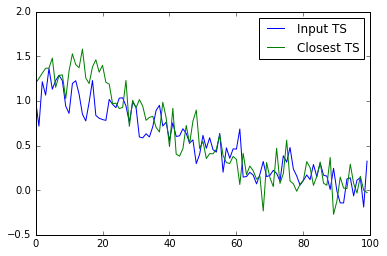

In [69]:
# visualize the results
plt.plot(query, label='Input TS')
plt.plot(tsdict[list(results.keys())[0]], label='Closest TS')
plt.legend(loc='best')
plt.show()

Enhanced Similarity Search
------------------
Runs an enhanced iSAX tree-based similarity search, which runs faster than the basic similarity search.

In [ ]:
# TODO: add function signature

In [ ]:
# TODO: examples

Termination
========

Remember to terminate any outstanding server and webserver processes.

In [70]:
# remember to terminate any outstanding processes
server.terminate()
webserver.terminate()